In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [2]:
# get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-02-17 09:55:34--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-02-17 09:55:34 (54.2 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [0]:
# Load in the data
data = pd.read_csv('moore.csv', header = None).values
#  Make it a 2-D array of size N x D where D = 1
# That's because tensorflow and keras expect our feature data in that format
X = data[:, 0].reshape(-1,1) # This is our features
Y = data[:, 1] # this is the targets

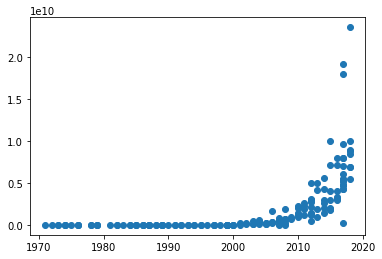

In [4]:
# We can see that the data is exponential
plt.scatter(X, Y)

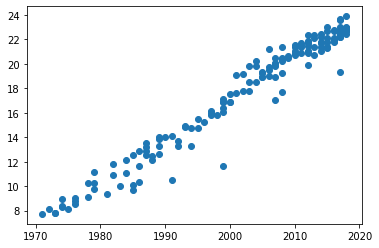

In [5]:
# Now if there's a exponential growth like:
# C = A*(r^t) where C is output, A is C when t = 0, r is growth rate and t is time by year
# If we take the log of both sides, the formula becomes this
# logC = logA + t * logr which is a linear.
# So let's take the log of targets, that will make our data linear
Y = np.log(Y)
plt.scatter(X, Y)
# We can see that the data became linear

In [0]:
# Let's also center the X data so the values are not large
# X is the year, it starts around 1970 and it ends around 2018
# So these are large values not centered around zero like 
# if we subtract the mean from the X, we can send them around zero

# We could also divide by the standard deviation but this will
# make transforming it back later which is more tricky
X = X - X.mean()

In [7]:
# Now we can create our tensorflow model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)), # Our data will be (*, 1)
  tf.keras.layers.Dense(1) # We don't use activation function
  # since we don't need to map y values to between 0 and 1
  # Also our output dimensionality is 1 as does the input
  ])
# Now lets compile the model with SGD and MSE 
# the first parameter is learning rate as we know, 
# the second one is momentum which allows us to 
# accelerate SGD in the relevant direction and dampen oscillations
# dampen: hafifletmek, söndürmek, nemlendirmek
# oscillation: salınım
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9),
              loss = "mse"
              )
# As we can see instead of passing the string, we can also pass an optimizer object to compile method

# model.compile(optimizer = "adam", loss = "mse") 

# Creating a learning rate scheduler
def schedule(epoch, lr): # epoch number and current learning rate
# we can change the function as we want but i made a simple example
# so we can return the new learning rate as  lr/(epoch*10) if we want to.
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Now we can train the model
# we'll pass our scheduler to function in callbacks argument
r = model.fit(X, Y, epochs = 200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 1ms/sample - loss: 413.5382
Epoch 2/200
162/162 [==============================] - 0s 106us/sample - loss: 345.6204
Epoch 3/200
162/162 [==============================] - 0s 102us/sample - loss: 316.9652
Epoch 4/200
162/162 [==============================] - 0s 104us/sample - loss: 221.9825
Epoch 5/200
162/162 [==============================] - 0s 96us/sample - loss: 232.2719
Epoch 6/200
162/162 [==============================] - 0s 86us/sample - loss: 158.5421
Epoch 7/200
162/162 [==============================] - 0s 77us/sample - loss: 102.1365
Epoch 8/200
162/162 [==============================] - 0s 87us/sample - loss: 64.9722
Epoch 9/200
162/162 [==============================] - 0s 85us/sample - loss: 64.6864
Epoch 10/200
162/162 [==============================] - 0s 92us/sample - loss: 35.9577
Epoch 11/200
162/162 [==============================] - 0s 80us/sample - loss: 43.7517
Epoch 12/200
162/162 [

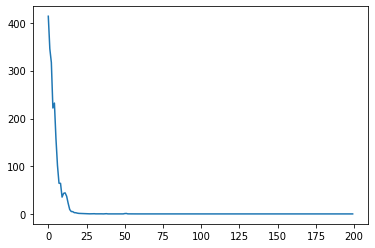

In [8]:
# Plot the loss
plt.plot(r.history['loss'], label = 'loss')

In [9]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
# also get the weights of the training model
# While creating the model, we passed 2 different layers:
# 1- Input and 2- Dense but you can see that there is only 1 layer in the output
# so you can think of the Input layer as a dummy layer
print(model.layers)
print(model.layers[0].get_weights())
# the first array represents w (weight) and second array represents b (bias)
# W.shape is (D,M) and b.shape is (M,) while D = input size and M = output size
# So we can get multiple outputs from Dense layer

[array([[0.34258318]], dtype=float32), array([17.780544], dtype=float32)]


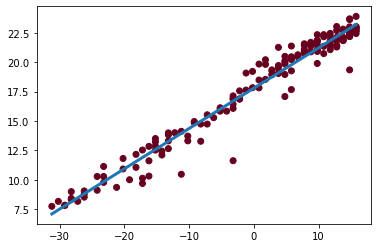

In [10]:
# The slope of the line is:
# if y = wx+b, then the slope is w remember?
w = model.layers[0].get_weights()[0][0 ,0]
bias = model.layers[0].get_weights()[1][0]
# To color the points to different color, I set a label from 0s above 
plt.scatter(X, Y, c = [0]*len(Y) ,cmap = 'RdBu') 
# Also if I can plot the regression line itself, 
# the formula was y = wx+b, I already know the slope (w) and the bias (b)
# so i can plot the regression line
plt.plot(X, X*w+bias, linewidth = 3)

Our original model for exponential growth is: 


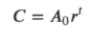


Where *C* is transistor the count and *t* is the year.
*r* is the rate of growth. For example, when *t* goes from 1 to 2, *C* increases by a factor of *r*. When *t* goes from 2 to 3, *C* increases by a factor of *r* again.
When we take the log of both sides, we get:



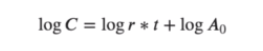



This is our linear equation:




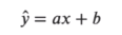



Where:




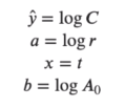

We are interested in *r*, because that's the rate of growth. Given our regression weights, we know that:

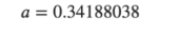


so that:


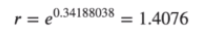

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for *C* to increase to 2*C*.
Let's call the original starting time *t*, to correspond with the initial transistor count *C*.
Let's call the end time *t'*, to correspond with the final transistor count *2C*.
Then we also have:



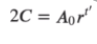


Combine this with our original equation:

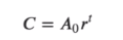

We get (by dividing the 2 equations):


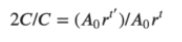


Which simplifies to:


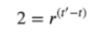

Solve for *t' - t*:


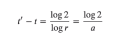


Important note! We haven't specified what the starting time *t* actually is, and we don't have to since we just proved that this holds for any *t*.

In [11]:
print('Time to double:', np.log(2) / w)
# so we can see that the time to double is approximately 2
# just as moore's law says it should be

Time to double: 2.023296011276584


In [12]:
# We can confirm Moore's Law is true with
# An analytical solution
A = np.array(X).flatten()
B = np.array(Y)
denominator = A.dot(A) - (A.mean() * A.sum())
a = ( A.dot(B) - (B.mean() * A.sum()) ) / denominator
b = ( (B.mean() * A.dot(A)) - (A.mean() * A.dot(B)) ) / denominator
print(a, b)
print('Time to double:', np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204
